In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Data_LogReg.csv', index_col='index')
df.head()

,Income,Purchase(Y/N)
index,,
0,59221.0,0
1,61823.0,1
2,60545.0,1
3,57752.0,0
4,53783.0,0


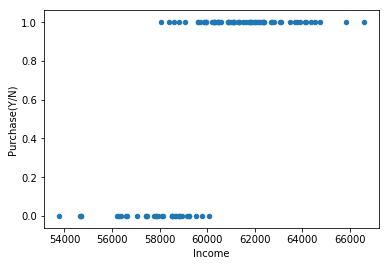

In [81]:
df.plot(kind='scatter', x='Income', y='Purchase(Y/N)')

In [82]:
X = df.iloc[:, [0]].values
y = df.iloc[:, [1]].values

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
from sklearn.metrics import confusion_matrix
y_train_pred = log_clf.predict(X_train)
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[21,  3],
       [ 4, 39]], dtype=int64)

In [87]:
y_test_pred = log_clf.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[10,  0],
       [ 1, 22]], dtype=int64)

In [88]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_pred)

1.0

In [89]:
recall_score(y_test, y_test_pred)

0.9565217391304348

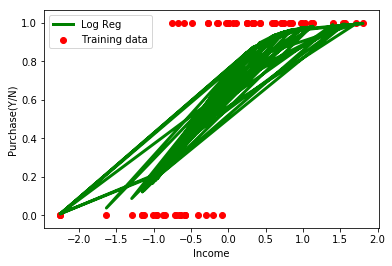

In [94]:
plt.scatter(X_train, y_train, color = 'red', label='Training data')
plt.xlabel('Income')
plt.ylabel('Purchase(Y/N)')

y_pred_proba = log_clf.predict_proba(X_train)[:,1]
plt.plot(X_train, y_pred_proba, color='green', linewidth=3, label='Log Reg')
plt.legend()

In [96]:
y_pred_proba = log_clf.predict_proba(X_train)[:,1]
y_pred_proba

array([0.56975296, 0.74209108, 0.95982407, 0.87443202, 0.18170276,
       0.66854888, 0.72325306, 0.12215724, 0.74310153, 0.03761844,
       0.93048144, 0.93362777, 0.94798594, 0.97475293, 0.08709781,
       0.58188933, 0.98255173, 0.94978059, 0.16562979, 0.586512  ,
       0.38441222, 0.9938942 , 0.66029865, 0.97677691, 0.87361716,
       0.00767043, 0.2323518 , 0.99126695, 0.49329623, 0.38066636,
       0.96392977, 0.84659385, 0.12758665, 0.98166007, 0.00756652,
       0.22379043, 0.99426132, 0.6270968 , 0.35124049, 0.89626592,
       0.32638033, 0.69871501, 0.30693907, 0.28084349, 0.95371146,
       0.99696471, 0.96246839, 0.93588432, 0.33858076, 0.19067233,
       0.89763402, 0.93626391, 0.44201688, 0.9961283 , 0.79182803,
       0.38566392, 0.1215915 , 0.30896694, 0.84480033, 0.77182146,
       0.00768654, 0.84521573, 0.86839109, 0.87303235, 0.74148357,
       0.37693464, 0.97333663])

In [ ]:
X_t